                                                      TRAVELERS  DATASET 

> OBJECTIVE >> CLEANING THE DATASET AND ELIMINATING ANY INCONSISTENCIES or INCORRECT DATA FORMAT . ALSO CARRYING OUT EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION.
             

>>>TABLE OF CONTENTS : 
    
                    1. IMPORTING DATASET & EXPLORING IT .
                    2. FIXING THE DATATYPE OF COLUMNS & INCONSISTENCIES IN DATA FORMAT
                    3. FEATURE ENGINEERING .
                    4. EXPLORATORY DATA ANALYSIS 
                    5. DATA INSIGHTS & SUMMARY

> 1. IMPORTING DATASET & EXPLORING IT.

In [2]:
# IMPORTING NECCESSARY LIBRARIES 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# READING THE DATASET 

df = pd.read_csv('traveler-trip-data/Travel details dataset.csv')
df.head(3)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700


In [4]:
df.describe()

,Trip ID,Duration (days),Traveler age
count,139.000000,137.000000,137.000000
mean,70.000000,7.605839,33.175182
std,40.269923,1.601276,7.145441
min,1.000000,5.000000,20.000000
25%,35.500000,7.000000,28.000000
50%,70.000000,7.000000,31.000000
75%,104.500000,8.000000,38.000000
max,139.000000,14.000000,60.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


In [6]:
#CHECKING FOR MISSING VALUES 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENTAGE'])

miss_values  = missing_values(df)
miss_values[miss_values != 0]

,TOTAL,PERCENTAGE
Transportation type,3.0,2.158273
Transportation cost,3.0,2.158273
Destination,2.0,1.438849
Start date,2.0,1.438849
End date,2.0,1.438849
Duration (days),2.0,1.438849
Traveler name,2.0,1.438849
Traveler age,2.0,1.438849
Traveler gender,2.0,1.438849
Traveler nationality,2.0,1.438849


In [7]:
# REMOVING NULL VALUES 

df.dropna(axis = 'rows' , inplace = True)

>> 2. FIXING THE DATA TYPE OF THE COLUMNS .

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               136 non-null    int64  
 1   Destination           136 non-null    object 
 2   Start date            136 non-null    object 
 3   End date              136 non-null    object 
 4   Duration (days)       136 non-null    float64
 5   Traveler name         136 non-null    object 
 6   Traveler age          136 non-null    float64
 7   Traveler gender       136 non-null    object 
 8   Traveler nationality  136 non-null    object 
 9   Accommodation type    136 non-null    object 
 10  Accommodation cost    136 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.9+ KB


>2.1 Start date & End date

In [9]:
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Trip ID               136 non-null    int64         
 1   Destination           136 non-null    object        
 2   Start date            136 non-null    datetime64[ns]
 3   End date              136 non-null    datetime64[ns]
 4   Duration (days)       136 non-null    float64       
 5   Traveler name         136 non-null    object        
 6   Traveler age          136 non-null    float64       
 7   Traveler gender       136 non-null    object        
 8   Traveler nationality  136 non-null    object        
 9   Accommodation type    136 non-null    object        
 10  Accommodation cost    136 non-null    object        
 11  Transportation type   136 non-null    object        
 12  Transportation cost   136 non-null    object        
dtypes: datetime64[ns](2)

>2.2 Accommodation cost

WE CAN SEE THERE ARE MANY INCONSISTENCIES IN THE DATA , SO WE NEED TO FIRST FIX THE DATA FORMAT AND THEN CHANGE THE DATA TYPE 

In [11]:
df.loc[df['Accommodation cost'].str.startswith('$' , na = False) , 'Accommodation cost']

16       $900 
17     $1,500 
18     $1,200 
19     $1,200 
20       $600 
21     $1,000 
22       $700 
23       $400 
24     $1,400 
25     $2,000 
26     $1,100 
27       $800 
28       $200 
29       $600 
30     $1,000 
31       $150 
32       $400 
33       $700 
34       $500 
35       $180 
36       $900 
37       $350 
49     $1,200 
50       $500 
51       $900 
52     $1,400 
53       $800 
54       $400 
55     $1,000 
56       $700 
57       $500 
58     $1,200 
59       $800 
94       $500 
95       $400 
96       $200 
97       $600 
98       $800 
99       $700 
100      $300 
101      $500 
102      $900 
103    $1,200 
104      $600 
Name: Accommodation cost, dtype: object

> FIXING THE DATA FORMAT OF THE COLUMN .

In [12]:
#removing the value'$' from the data 

df.loc[df['Accommodation cost'].str.startswith('$' , na = False) , 'Accommodation cost'] = df.loc[df['Accommodation cost'].str.startswith('$' , na = False) , 'Accommodation cost'].str.replace('$', '')

/tmp/ipykernel_80/48581986.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[df['Accommodation cost'].str.startswith('$' , na = False) , 'Accommodation cost'] = df.loc[df['Accommodation cost'].str.startswith('$' , na = False) , 'Accommodation cost'].str.replace('$', '')


In [13]:
#replacing the value '1,' with 1
df.loc[df['Accommodation cost'].str.startswith('1,' , na = False) , 'Accommodation cost'] = df.loc[df['Accommodation cost'].str.startswith('1,', na = False) , 'Accommodation cost'].str.replace('1,' , '1')

In [14]:
#replacing the value '2,' with 2 
df.loc[df['Accommodation cost'].str.startswith('2,' , na = False) , 'Accommodation cost'] = df.loc[df['Accommodation cost'].str.startswith('2,' , na = False) , 'Accommodation cost'].str.replace('2,','2')

In [15]:
#removing 'USD' from the numeric values
df.loc[df['Accommodation cost'].str.contains('USD', na = False) , 'Accommodation cost'] = df.loc[df['Accommodation cost'].str.contains('USD', na = False) , 'Accommodation cost'].str.replace('USD', '') 

In [16]:
df['Accommodation cost'] = pd.to_numeric(df['Accommodation cost'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Trip ID               136 non-null    int64         
 1   Destination           136 non-null    object        
 2   Start date            136 non-null    datetime64[ns]
 3   End date              136 non-null    datetime64[ns]
 4   Duration (days)       136 non-null    float64       
 5   Traveler name         136 non-null    object        
 6   Traveler age          136 non-null    float64       
 7   Traveler gender       136 non-null    object        
 8   Traveler nationality  136 non-null    object        
 9   Accommodation type    136 non-null    object        
 10  Accommodation cost    136 non-null    int64         
 11  Transportation type   136 non-null    object        
 12  Transportation cost   136 non-null    object        
dtypes: datetime64[ns](2)

>2.3 Transportation cost

In [18]:
#removing the value'$' from the data 

df.loc[df['Transportation cost'].str.startswith('$' , na = False) , 'Transportation cost'] = df.loc[df['Transportation cost'].str.startswith('$' , na = False) , 'Transportation cost'].str.replace('$', '')

/tmp/ipykernel_80/682433291.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[df['Transportation cost'].str.startswith('$' , na = False) , 'Transportation cost'] = df.loc[df['Transportation cost'].str.startswith('$' , na = False) , 'Transportation cost'].str.replace('$', '')


In [19]:
#replacing the value 'USD' with ''
df.loc[df['Transportation cost'].str.contains('USD', na = False) , 'Transportation cost'] = df.loc[df['Transportation cost'].str.contains('USD', na = False) , 'Transportation cost'].str.replace('USD', '') 

In [20]:
#replacing the value '1,' with 1
df.loc[df['Transportation cost'].str.startswith('1,' , na = False) , 'Transportation cost'] = df.loc[df['Transportation cost'].str.startswith('1,', na = False) , 'Transportation cost'].str.replace('1,' , '1')

In [21]:
df['Transportation cost'] = pd.to_numeric(df['Transportation cost'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Trip ID               136 non-null    int64         
 1   Destination           136 non-null    object        
 2   Start date            136 non-null    datetime64[ns]
 3   End date              136 non-null    datetime64[ns]
 4   Duration (days)       136 non-null    float64       
 5   Traveler name         136 non-null    object        
 6   Traveler age          136 non-null    float64       
 7   Traveler gender       136 non-null    object        
 8   Traveler nationality  136 non-null    object        
 9   Accommodation type    136 non-null    object        
 10  Accommodation cost    136 non-null    int64         
 11  Transportation type   136 non-null    object        
 12  Transportation cost   136 non-null    int64         
dtypes: datetime64[ns](2)

                                            NOW ALL THE COLUMNS HAVE THE APPROPRIATE DATA-TYPES

>> 3. FEATURE ENGINEERING 

>3.1 SPLITTING  DESTINATION  COLUMN TO  DESTINATION COUNTRY & DESTINATION CITY.

In [23]:
df.head(1)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600


In [24]:
df['Destination'].str.split(',')[:5]

0          [London,  UK]
1    [Phuket,  Thailand]
2     [Bali,  Indonesia]
3       [New York,  USA]
4        [Tokyo,  Japan]
Name: Destination, dtype: object

In [25]:
df['Destination_city'] = df['Destination'].str.split(',').str[0]
df['Destination_country'] = df['Destination'].str.split(',').str[1]

In [26]:
#dropping the destination column as it is no longer needed 

df.drop('Destination' , axis = 1 , inplace = True)

In [27]:
df.head(1)

,Trip ID,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Destination_city,Destination_country
0,1,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,London,UK


>3.2 SPLITTING THE START DATE & END DATE COLUMN TO DAY , MONTH & YEAR . ( FOR MORE DETAILED ANALYSIS )

In [28]:
df['Start day'] = df['Start date'].dt.day
df['Start month'] = df['Start date'].dt.month
df['Start year'] = df['Start date'].dt.year

In [29]:
df['End day'] = df['End date'].dt.day
df['End month'] = df['End date'].dt.month
df['End year'] = df['End date'].dt.year

In [30]:
df.head(1)

,Trip ID,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Destination_city,Destination_country,Start day,Start month,Start year,End day,End month,End year
0,1,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,London,UK,1,5,2023,8,5,2023


In [31]:
#dropping 'start date' & 'end date' columns as it is no longer needed 

df.drop('Start date' , axis = 1 , inplace = True)
df.drop('End date' , axis = 1 ,  inplace = True)

In [32]:
df.head(1)

,Trip ID,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Destination_city,Destination_country,Start day,Start month,Start year,End day,End month,End year
0,1,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,London,UK,1,5,2023,8,5,2023


>> 4. EXPLORATORY DATA ANALYSIS

In [33]:
df.head(3)

,Trip ID,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Destination_city,Destination_country,Start day,Start month,Start year,End day,End month,End year
0,1,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,London,UK,1,5,2023,8,5,2023
1,2,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand,15,6,2023,20,6,2023
2,3,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia,1,7,2023,8,7,2023


4.1 VISUALIZING THE % OF MALE & FEMALE TRAVELLERS

Text(0.5, 1.0, 'NUMBER OF MALE & FEMALE TRAVELLERS')

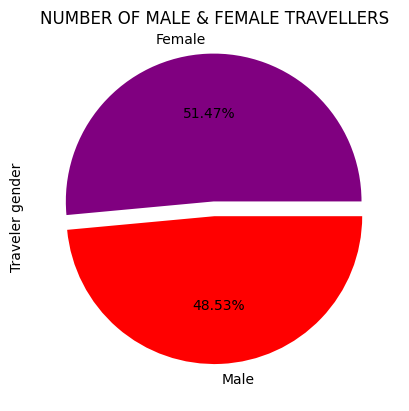

In [34]:
df['Traveler gender'].value_counts().plot(kind = 'pie' , autopct = '%1.2f%%' , explode = (0.1 , 0) , colors = ['purple' , 'red'])
plt.title('NUMBER OF MALE & FEMALE TRAVELLERS')

4.2 FINDING THE NUMBER OF TRAVELLERS FROM EACH COUNTRY 

<Axes: >

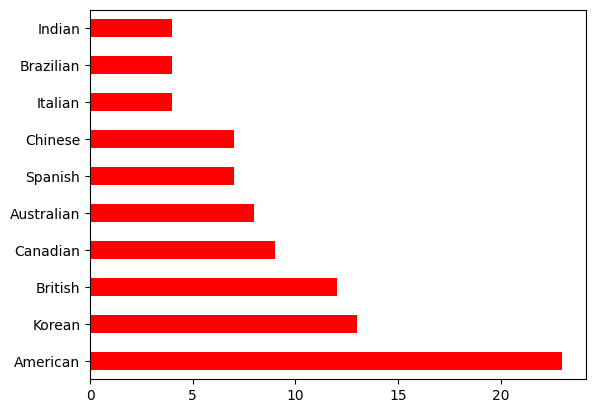

In [35]:
df['Traveler nationality'].value_counts().sort_values(ascending = False)[:10].plot.barh( color = 'red')

4.3 LIST OF ALL THE ACCOMODATION AND TRANSPORTATION TYPE USED BY THE TRAVELLERS

In [36]:
accommodation_type = np.array(df['Accommodation type'].unique())
accommodation_type

array(['Hotel', 'Resort', 'Villa', 'Airbnb', 'Hostel', 'Riad',
       'Vacation rental', 'Guesthouse'], dtype=object)

In [37]:
transportation_type = np.array(df['Transportation type'].unique())
transportation_type

array(['Flight', 'Train', 'Plane', 'Bus', 'Car rental', 'Subway', 'Car',
       'Ferry', 'Airplane'], dtype=object)

4.3 FINDING OUT WHICH DESTINATION COUNTRY & CITY HAD MOST NUMBER OF TRAVELLERS 

<Axes: >

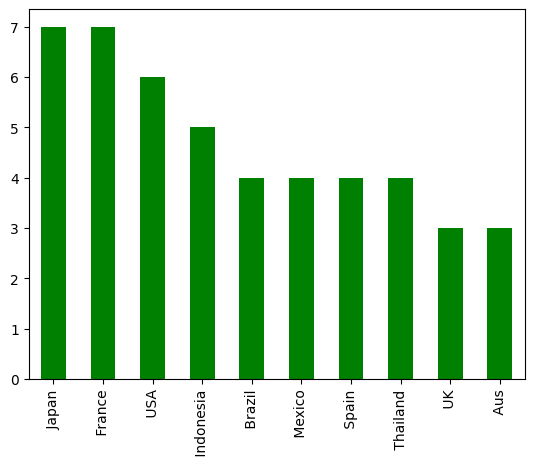

In [38]:
df['Destination_country'].value_counts().sort_values(ascending = False)[:10].plot.bar(color = 'green')

<Axes: >

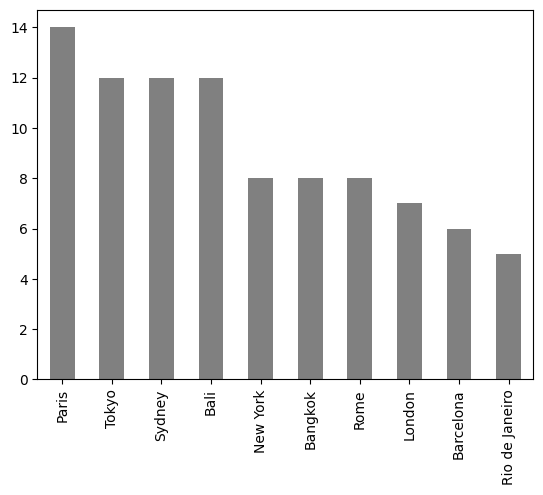

In [39]:
#FINDING  WHICH  CITY  HAD  THE  MOST  TRAVELLERS 

df['Destination_city'].value_counts().sort_values(ascending = False)[:10].plot.bar(color = 'grey')

4.4 WHICH ACCOMODATION WAS MOST PREFERRED BY MALE & FEMALE

In [40]:
df[df['Traveler gender'] == 'Female'].groupby('Accommodation type').size().sort_values(ascending = False)

Accommodation type
Hotel              30
Airbnb             18
Hostel              9
Resort              9
Vacation rental     2
Riad                1
Villa               1
dtype: int64

In [41]:
df[df['Traveler gender'] == 'Male'].groupby('Accommodation type').size().sort_values(ascending = False)

Accommodation type
Hotel              29
Hostel             15
Airbnb             12
Resort              5
Villa               3
Guesthouse          1
Vacation rental     1
dtype: int64

4.5 WHICH TRANSPORTATION WAS WIDELY USED ? 

In [42]:
arr = df['Transportation type'].unique()
arr

array(['Flight', 'Train', 'Plane', 'Bus', 'Car rental', 'Subway', 'Car',
       'Ferry', 'Airplane'], dtype=object)

<Axes: ylabel='Transportation type'>

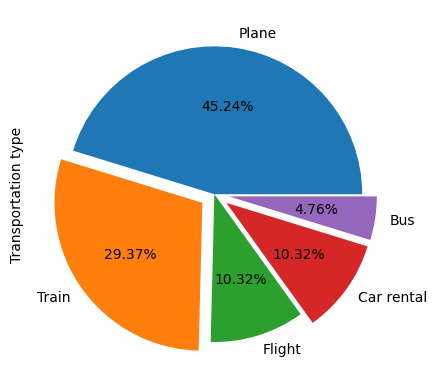

In [43]:
df['Transportation type'].value_counts().sort_values(ascending = False)[:5].plot(  kind = 'pie' , autopct = '%1.2f%%' , explode = (0,0.1,0,0.1,0.1))

4.6 FINDING OUT WHICH YEAR HAD MOST NUMBER OF TRAVELLERS 

<Axes: >

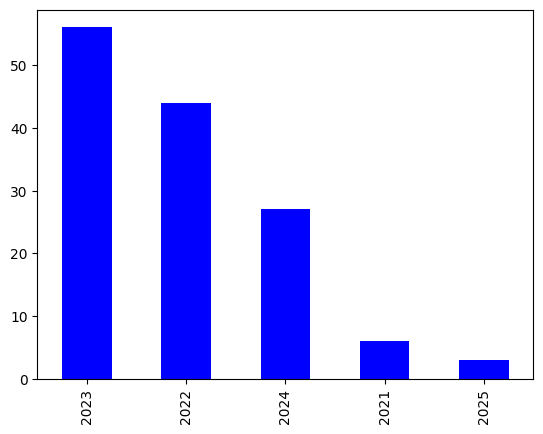

In [44]:
df['Start year'].value_counts().sort_values(ascending = False).plot(kind = 'bar' , color = 'blue')

>> 5. DATA INSIGHTS & SUMMARY

1. 51% PERCENT OF TRAVELLERS ARE FEMALE & 49% ARE MALE TRAVELLERS 
2. AMERICAN CITIZENS HAVE TRAVELLED THE MOST , FOLLOWED BY KOREANS AND BRITISH 
3. MOST VISITED COUNTRY IS JAPAN & FRANCE . MOST VISITED CITY IS PARIS .
4. FEMALE TRAVELLERS PREFERRED TO STAY IN HOTEL & AIRBNB THE MOST .
5. FLIGHTS & TRAINS ARE THE WIDELY USED MEANS OF TRANSPORT.
6. YEAR 2023 HAD THE MOST NUMBER OF TRAVELLLERS .